<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/BankNoteAuthentication/BankNoteAuthentication_StratifiedCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd

In [76]:
url="https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/BankNoteAuthentication/banknote_authentication.csv"
df=pd.read_csv(url)
df.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [77]:
df.shape

(1372, 5)

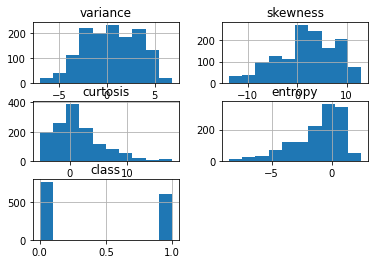

In [78]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

* From the above plot we can see that there is skewness in data which need to be corrected.

In [79]:
#preparing feature & target variables
feature_cols=df.drop(columns='class',axis=1) #input variables
target_var=df['class'] #output variable

In [80]:
#import PowerTransformer to transform data for skewness
from sklearn.preprocessing import PowerTransformer
yeo = PowerTransformer(method='yeo-johnson')
#applying power transform on data to reduce skewness
data_trans=yeo.fit_transform(feature_cols)

In [81]:
#converting the transformed data from numpy array to dataframe
trans_feature_cols=pd.DataFrame(data_trans,columns=feature_cols.columns.to_list())

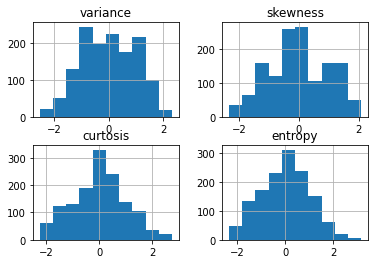

In [82]:
#Plotting Histogram to see data distribution post transformation
trans_feature_cols.hist()
plt.show()

* From this plot we can say that skewness is curtosis & entropy fields has reduced.

In [83]:
#checking the percentage of data present for each class in the dataset
df['class'].value_counts()/df['class'].count()

0    0.555394
1    0.444606
Name: class, dtype: float64

* The dataset seems balanced, so we need not perform any data imbalance techniques.
* Let us split data for train and test using StratifiedKFold CV which can be used on imbalance datasets.

In [84]:
X=trans_feature_cols
y=target_var

* Let us split dataset into train and test. So, that we can run our model later on Test data.

In [85]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [86]:
print('Shape of Train data:',trainX.shape)
print('Shape of Test data:',testX.shape)

Shape of Train data: (1097, 4)
Shape of Test data: (275, 4)


Accuracy Score > 1.000 
Accuracy Score > 1.000 
Accuracy Score > 1.000 
Accuracy Score > 1.000 
Accuracy Score > 1.000 
Accuracy Score > 0.991 
Accuracy Score > 1.000 
Accuracy Score > 1.000 
Accuracy Score > 0.991 
Accuracy Score > 1.000 


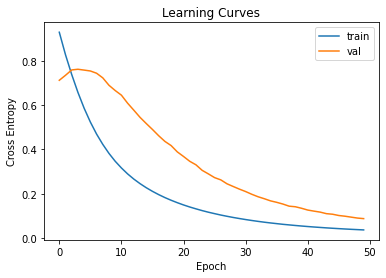

Mean Accuracy: 0.998 (0.004)


In [87]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
#import tensorflow model and layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#import accracy_score from metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(trainX, trainy):
	# split data
	X_train, X_test, y_train, y_test = X.iloc[train_ix], X.iloc[test_ix], y.iloc[train_ix], y.iloc[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))
	# predict validation set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('Accuracy Score > %.3f ' % score)
	scores.append(score)

# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

* From this the accuracy is 99.2 and both training & validation loss have come down.
* Now, let us make predictions on our test dataset which we've of 20% of original dataset.

In [88]:
#make predictions on test data
yhat = model.predict_classes(testX)

In [133]:
yhat

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    